### Laboration deep learning AI21
---
Syftet med den här labben är att använda deep learning för computer vision för att lära sig att klassificera
olika objekt.
I den här labben kommer du få jobba med bildbehandling, filhantering, bygga upp egna tränings, validerings
och testdataset från en mängd av bilder. Vidare får du jobba med begränsade datamängder för att efterlikna
verkligheten när dataanskaffning är en oerhört dyr process. Efter databehandlingen och databearbetningen
kommer du få pröva olika slags convolutional neural networks tränade från scratch och slutligen använda
dig av transfer learning för att återanvända nätverk skapade av toppforskare inom computer vision.

---
0. EDA och filhantering (*)

a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder,
glöm inte att lägga till den till .gitignore.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import os

plt.style.use("seaborn-white")

b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

In [26]:
# plot dog photos from the dogs vs cats dataset
import matplotlib.pyplot as plt
import random
from matplotlib.image import imread
# define location of dataset
folder = 'original_data/train/train/'

def display_images(n_of_images=10, nrows = 2, ncols = 5, figsize = (12,4)):
    images = []
	# generate a list of ten random labels among 'cat', and 'dog'
	# generate a list of ten random numbers
	# these ten labels+numbers pick ten random images saved in images list
    labels = [random.choice(["cat", "dog"]) for i in range(n_of_images)]
    numbers = random.sample(range(12500), n_of_images)


	# randomly pick ten images according to randomly picked labels and numbers
    for label, number in zip(labels, numbers):
		# define filename
        filename = folder + label + '.' + str(number) + '.jpg'
		# load image pixels
        image = imread(filename)
		# save the image to images list
        images.append(image)
    
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)
	
    for i, ax, label in zip(range(n_of_images), axes.flatten(), labels):
        ax.imshow(images[i])
        ax.axis("off")
        if label == "cat":
            ax.set(title="Cat")
        else:
            ax.set(title="Dog")

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)


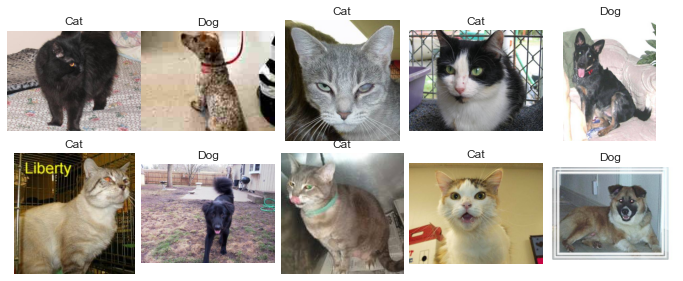

In [27]:
display_images()

train_dir = os.path.abspath("original_data/train/train/")
test_dir = os.path.abspath("original_data/test/test/")


files_train_dir = os.listdir(train_dir)
files_test_dir = os.listdir(test_dir)

train_dir="/kaggle/input/dogs-vs-cats/train/train"
len(os.listdir(train_dir))
test_dir="/kaggle/input/dogs-vs-cats/test/test"
len(os.listdir(train_dir))

IMG_SIZE = 10

CATEGORIES = ["cat", "dog"]

def train_data():
    train_data=[]
    labels=[]
    images=[]
    
    imagefiles=[os.path.join(train_dir,f) for f in os.listdir(train_dir)]
    for image in imagefiles:
        category = image.split('/')[-1].split('.')[0]
        img_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        train_data .append([new_array, CATEGORIES.index(category)])
        np.random.shuffle(train_data)
    for features,label in train_data:
        images.append(features)
        labels.append(label)
    images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    return images, labels
                             

files_train_dir

def display_images(data, nrows = 2, ncols = 5, figsize = (12,4)):
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap = "gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

c) Skapa folderstrukturen nedan med Python, Notera att det är okej att ha fler pythonskript, notebooks, fler experiment, eller annat relevant i labbfoldern. Glöm inte att ha gitignore på datafilerna.

d) Nu ska du göra train|val|test split med följande splits:

experiment_small
- train - 1600 (800 dogs, 800 cats)
- val - 400 (200 dogs, 200 cats)
- test - 500 (250 dogs, 250 cats)

experiment_tiny (BONUS)
- train - 160 (80 dogs, 80 cats)
- val - 40 (20 dogs, 20 cats)
- test - 50 (25 dogs, 25 cats)